In [2]:
# Import Necessary Libraries and Data
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


In [3]:
#please change the file path to run it in your system
df = pd.read_csv('C:/Users/Naina-pc/Downloads/week 4 - Nashville_housing_data.csv')
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [4]:
#filter data for nashville
df1 = df[df.City.isin(["NASHVILLE"])] 
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18013 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         18013 non-null  int64  
 1   Parcel ID                          18013 non-null  object 
 2   Land Use                           18013 non-null  object 
 3   Property Address                   18011 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      18011 non-null  object 
 6   Sale Date                          18013 non-null  object 
 7   Legal Reference                    18013 non-null  object 
 8   Sold As Vacant                     18013 non-null  object 
 9   Multiple Parcels Involved in Sale  18013 non-null  object 
 10  City                               18013 non-null  object 
 11  State                              18013 non-null  obj

In [5]:
#check null values
print(df1.isnull().sum())
print(df1.head())

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     18013
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [6]:
#convert date to datetime and then find how old the property is
import datetime
current_year = datetime.datetime.now().year
df1['Years_old'] = current_year - df1['Year Built']
df1.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Years_old
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over,82
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over,23
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under,75
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under,113
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under,78


In [7]:
#As per instructions, do not use columns starting with 'Accepted' and irrelevant columns 
df2 = df1.drop(['State','Unnamed: 0','Parcel ID','Legal Reference','Suite/ Condo   #','City','Property City','Year Built'], axis=1)

In [8]:
#check null values
print(df2.isnull().sum())
print(df2.head())

Land Use                              0
Property Address                      2
Sale Date                             0
Sold As Vacant                        0
Multiple Parcels Involved in Sale     0
Acreage                               0
Tax District                          0
Neighborhood                          0
Land Value                            0
Building Value                        0
Finished Area                         1
Foundation Type                       1
Exterior Wall                         0
Grade                                 0
Bedrooms                              3
Full Bath                             1
Half Bath                            80
Sale Price Compared To Value          0
Years_old                             0
dtype: int64
        Land Use   Property Address  Sale Date Sold As Vacant  \
0  SINGLE FAMILY   1802  STEWART PL  1/11/2013             No   
1  SINGLE FAMILY  2761  ROSEDALE PL  1/18/2013             No   
2  SINGLE FAMILY  224  PEACHTREE

In [9]:
#dropping null records
df3 = df2.dropna()
print(df3.info())
print(df3.isnull().sum())
print(df3.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17926 entries, 0 to 22650
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           17926 non-null  object 
 1   Property Address                   17926 non-null  object 
 2   Sale Date                          17926 non-null  object 
 3   Sold As Vacant                     17926 non-null  object 
 4   Multiple Parcels Involved in Sale  17926 non-null  object 
 5   Acreage                            17926 non-null  float64
 6   Tax District                       17926 non-null  object 
 7   Neighborhood                       17926 non-null  int64  
 8   Land Value                         17926 non-null  int64  
 9   Building Value                     17926 non-null  int64  
 10  Finished Area                      17926 non-null  float64
 11  Foundation Type                    17926 non-null  obj

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17926 entries, 0 to 22650
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Land Use                           17926 non-null  object        
 1   Property Address                   17926 non-null  object        
 2   Sale Date                          17926 non-null  datetime64[ns]
 3   Sold As Vacant                     17926 non-null  object        
 4   Multiple Parcels Involved in Sale  17926 non-null  object        
 5   Acreage                            17926 non-null  float64       
 6   Tax District                       17926 non-null  object        
 7   Neighborhood                       17926 non-null  int64         
 8   Land Value                         17926 non-null  int64         
 9   Building Value                     17926 non-null  int64         
 10  Finished Area                     

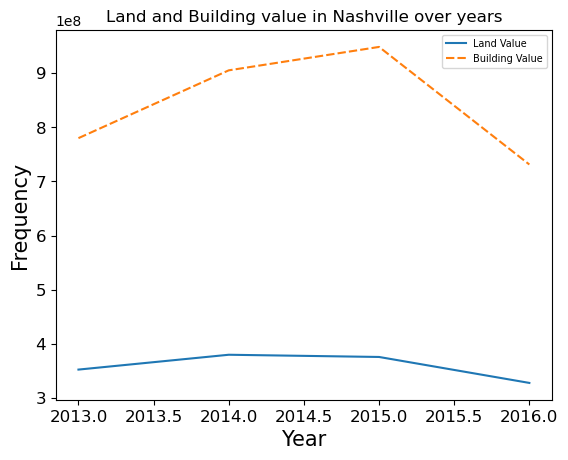

In [10]:
# Convert the "sale_date" column to datetime if it's not already in the datetime format 
df3['Sale Date'] = pd.to_datetime(df3['Sale Date'])

# Extract the year from the "sale_date" column and create a new column named "year" 
df3['saleyear'] = df3['Sale Date'].dt.year 
print(df3.info())

result = df3.groupby("saleyear").agg({"Land Value": "sum", "Building Value":"sum"})
print(result)

# Plot the data to see where models are being manufactured more
# plot multiple columns such as population and year from dataframe
sns.lineplot(data=result[["Land Value", "Building Value"]])
plt.legend(title='', fontsize=7)
plt.xlabel('Year', fontsize=15);
plt.ylabel('Frequency', fontsize=15);
plt.title('Land and Building value in Nashville over years', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)


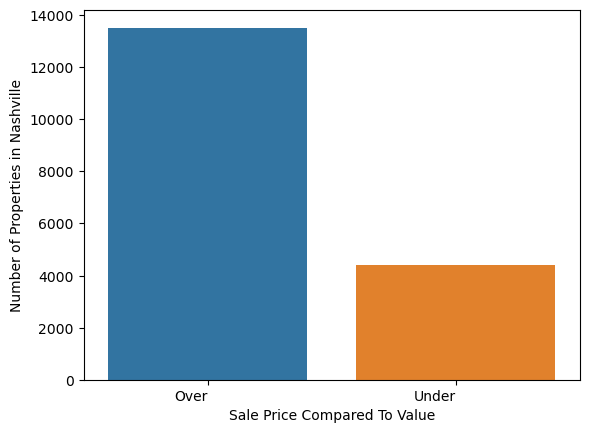

In [11]:
d = df3.groupby('Sale Price Compared To Value', as_index = False)['Sale Price Compared To Value'].size()
status = ['Under', 'Over']
d.insert(2,"status", ['Under', 'Over'])

sns.barplot(x = 'Sale Price Compared To Value',
            y = 'size',
            data = d)
plt.title('')
plt.xticks(rotation=0, ha='right')
plt.xlabel('Sale Price Compared To Value')
plt.ylabel('Number of Properties in Nashville')
plt.show()

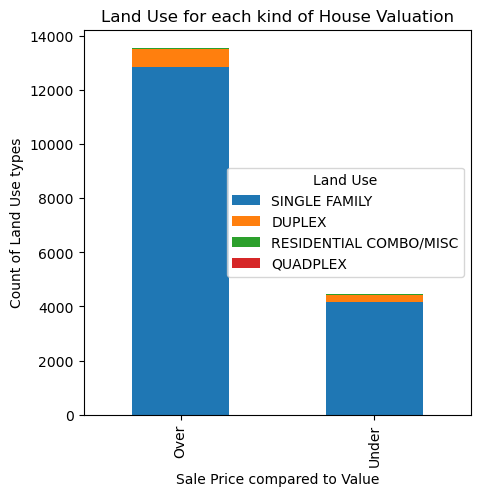

In [12]:
# 6. Stacked bar graph for the Petrolling boro and crime 
# Group the data by OFNS_DESC and PATROL_BORO, and count the incidents
grouped_data = df1.groupby([ 'Sale Price Compared To Value','Land Use'])['Unnamed: 0'].count().reset_index()

# Get the top 5 OFNS_DESC categories by incident count
top_ofns_desc = grouped_data.groupby('Land Use')['Unnamed: 0'].sum().sort_values(ascending=False).head(5).index

# Filter the data to include only the top 5 OFNS_DESC categories
filtered_data = grouped_data[grouped_data['Land Use'].isin(top_ofns_desc)]

# Pivot the data to create a table with OFNS_DESC as rows, PATROL_BORO as columns, and incident count as values
pivoted_data = filtered_data.pivot(index='Sale Price Compared To Value', columns='Land Use', values='Unnamed: 0')

# Sort the columns in descending order of total incident count
pivoted_data = pivoted_data[pivoted_data.sum().sort_values(ascending=False).index]

# Plot the stacked bar chart
pivoted_data.plot(kind='bar', stacked=True, figsize=(5, 5))

# Add labels and title
plt.xlabel('Sale Price compared to Value')
plt.ylabel('Count of Land Use types')
plt.title('Land Use for each kind of House Valuation')

# Show the chart
plt.show()

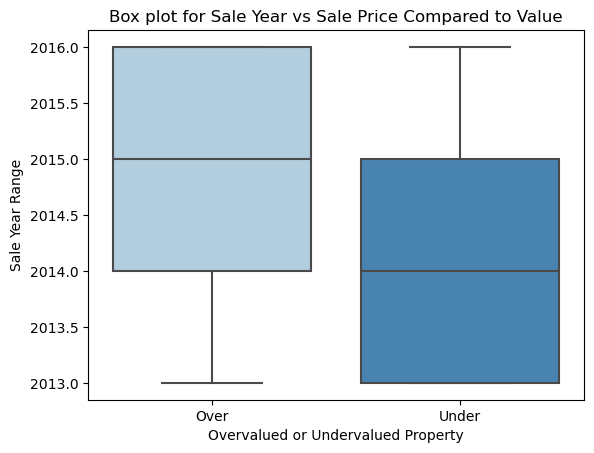

In [13]:
sns.boxplot(x=df3['Sale Price Compared To Value'],y=df3['saleyear'],palette="Blues")

#Customize the distribution plot
plt.title('Box plot for Sale Year vs Sale Price Compared to Value')
plt.xlabel('Overvalued or Undervalued Property')
plt.ylabel('Sale Year Range')

# Display the Distribution plot
plt.show()

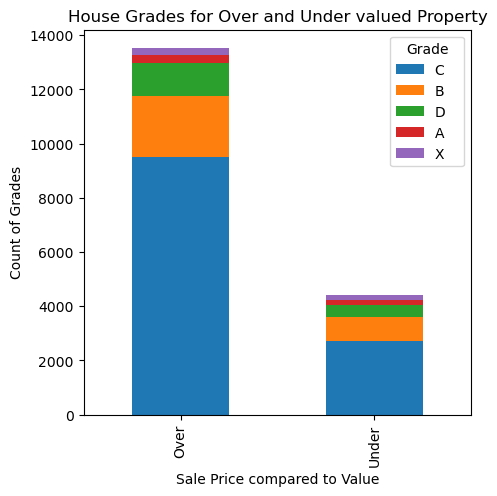

In [14]:
# 6. Stacked bar graph for the Petrolling boro and crime 
# Group the data by OFNS_DESC and PATROL_BORO, and count the incidents
grouped_data = df1.groupby([ 'Sale Price Compared To Value','Grade'])['Unnamed: 0'].count().reset_index()

# Get the top 5 OFNS_DESC categories by incident count
top_grades = grouped_data.groupby('Grade')['Unnamed: 0'].sum().sort_values(ascending=False).head(5).index

# Filter the data to include only the top 5 OFNS_DESC categories
filtered_data = grouped_data[grouped_data['Grade'].isin(top_grades)]

# Pivot the data to create a table with OFNS_DESC as rows, PATROL_BORO as columns, and incident count as values
pivoted_data = filtered_data.pivot(index='Sale Price Compared To Value', columns='Grade', values='Unnamed: 0')

# Sort the columns in descending order of total incident count
pivoted_data = pivoted_data[pivoted_data.sum().sort_values(ascending=False).index]

# Plot the stacked bar chart
pivoted_data.plot(kind='bar', stacked=True, figsize=(5, 5))

# Add labels and title
plt.xlabel('Sale Price compared to Value')
plt.ylabel('Count of Grades')
plt.title('House Grades for Over and Under valued Property')

# Show the chart
plt.show()

In [15]:
df4 = df3.drop(['Property Address', 'Neighborhood','Sale Date'], axis=1)
print(df4)

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

data= df4.copy()

# Define the list of categorical column names
categorical_columns = ['Land Use','Sold As Vacant','Multiple Parcels Involved in Sale','Tax District','Foundation Type','Exterior Wall','Grade','Sale Price Compared To Value']

# Encode categorical variables
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Print the updated DataFrame
print(data.head())


            Land Use Sold As Vacant Multiple Parcels Involved in Sale  \
0      SINGLE FAMILY             No                                No   
1      SINGLE FAMILY             No                                No   
2      SINGLE FAMILY             No                                No   
3      SINGLE FAMILY             No                                No   
4      SINGLE FAMILY             No                                No   
...              ...            ...                               ...   
22632  SINGLE FAMILY             No                                No   
22634  SINGLE FAMILY             No                                No   
22635  SINGLE FAMILY             No                                No   
22649  SINGLE FAMILY             No                                No   
22650  SINGLE FAMILY             No                                No   

       Acreage             Tax District  Land Value  Building Value  \
0         0.17  URBAN SERVICES DISTRICT       32000 

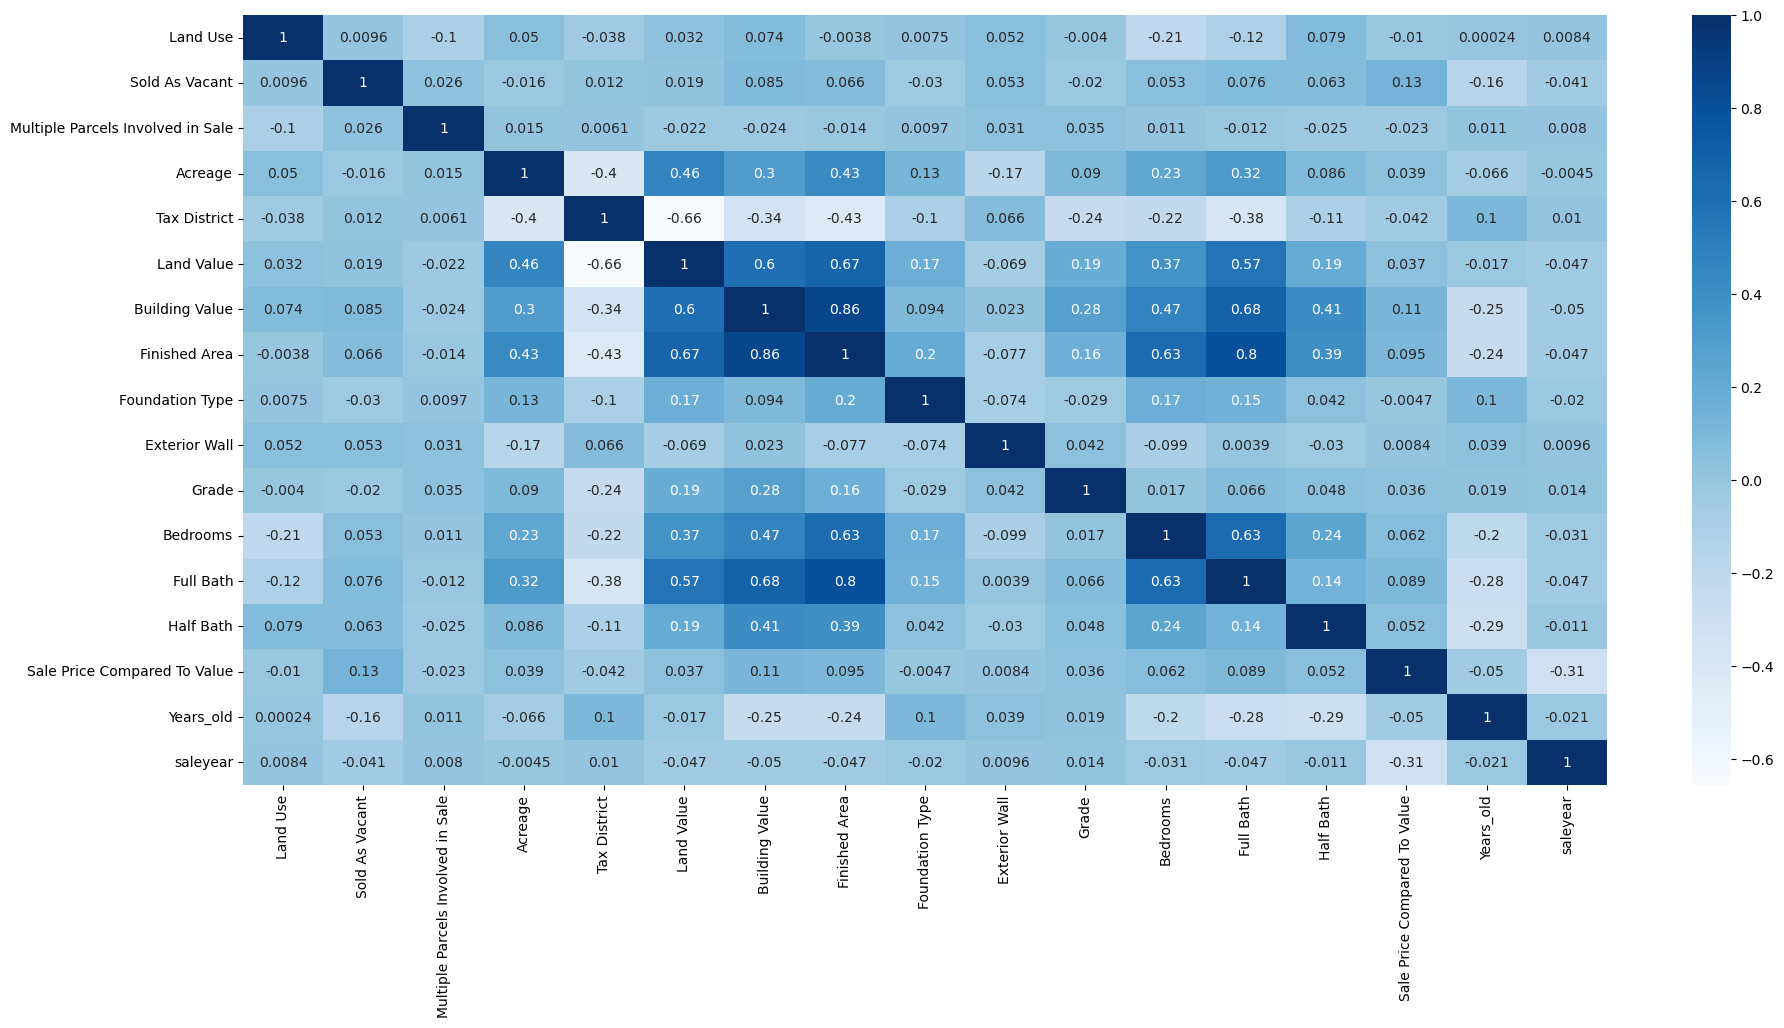

In [44]:
#correlation plot
plt.figure(figsize=(22,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

# Logistic Regression Model

In [50]:
target = 'Sale Price Compared To Value'

# Combine numerical and categorical encoded features
X = data.drop(['Sale Price Compared To Value'], axis=1)
y = data['Sale Price Compared To Value'].astype(int)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating and fitting the logistic regression model
log_reg = sm.Logit(y_train, sm.add_constant(X_train))
log_reg_fit = log_reg.fit()

# Printing the summary table
print(log_reg_fit.summary())


Optimization terminated successfully.
         Current function value: 0.497092
         Iterations 8
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                14340
Model:                                    Logit   Df Residuals:                    14323
Method:                                     MLE   Df Model:                           16
Date:                          Sun, 18 Jun 2023   Pseudo R-squ.:                  0.1094
Time:                                  17:16:17   Log-Likelihood:                -7128.3
converged:                                 True   LL-Null:                       -8004.0
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [66]:
# Extracting the coefficient values and variable names
coef_values = log_reg_fit.params
variable_names = log_reg_fit.params.index

# Calculating the exponential values
exp_values = np.exp(coef_values)

# Printing the coefficient values, variable names, and their corresponding exponential values
for variable, coef, exp in zip(variable_names, coef_values, exp_values):
    print(f"Variable: {variable}, Coefficient: {coef}, Exponential Value: {exp}")
    
# Predicting on the test set
X_test = sm.add_constant(X_test)  # Add constant column to test set
y_pred = log_reg_fit.predict(X_test)
y_pred_rounded = y_pred.round().astype(int)

cm=confusion_matrix(y_test, y_pred_rounded)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Variable: const, Coefficient: 1438.0524290026715, Exponential Value: inf
Variable: Land Use, Coefficient: -0.05874040451698528, Exponential Value: 0.9429515233433464
Variable: Sold As Vacant, Coefficient: 3.347662830772973, Exponential Value: 28.436195717293856
Variable: Multiple Parcels Involved in Sale, Coefficient: -0.5724135767079774, Exponential Value: 0.5641621455410352
Variable: Acreage, Coefficient: 0.13906436499623245, Exponential Value: 1.1491980657523495
Variable: Tax District, Coefficient: -0.14828883938513276, Exponential Value: 0.8621820468411564
Variable: Land Value, Coefficient: -2.4276157743263378e-06, Exponential Value: 0.9999975723871724
Variable: Building Value, Coefficient: 1.1284191124564313e-06, Exponential Value: 1.0000011284197492
Variable: Finished Area, Coefficient: 7.962888746023711e-06, Exponential Value: 1.00000796292045
Variable: Foundation Type, Coefficient: -0.025256367113759285, Exponential Value: 0.975059906689108
Variable: Exterior Wall, Coefficient:

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['0' '1'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [ ]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)
print("\n Accuracy of this Model is : ", accuracy)
# Evaluating the model
print(classification_report(y_test, y_pred_rounded))

# Decision Tree Model

In [ ]:
target = 'Sale Price Compared To Value'

# Combine numerical and categorical encoded features
X = data.drop(['Sale Price Compared To Value'], axis=1)
y = data['Sale Price Compared To Value'].astype(int)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating and fitting the decision tree model
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
decision_tree.fit(X_train, y_train)

# Get the unique target class values
class_values = y.unique()

plt.figure(figsize=(50, 20))
tree.plot_tree(decision_tree, feature_names=X_train.columns, class_names=[f'{class_value} ({y_train.value_counts()[class_value]})' for class_value in class_values], fontsize=30)
#tree.plot_tree(decision_tree, feature_names=X_train.columns, fontsize=30)

# Predicting on the test set
y_pred = decision_tree.predict(X_test)



In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

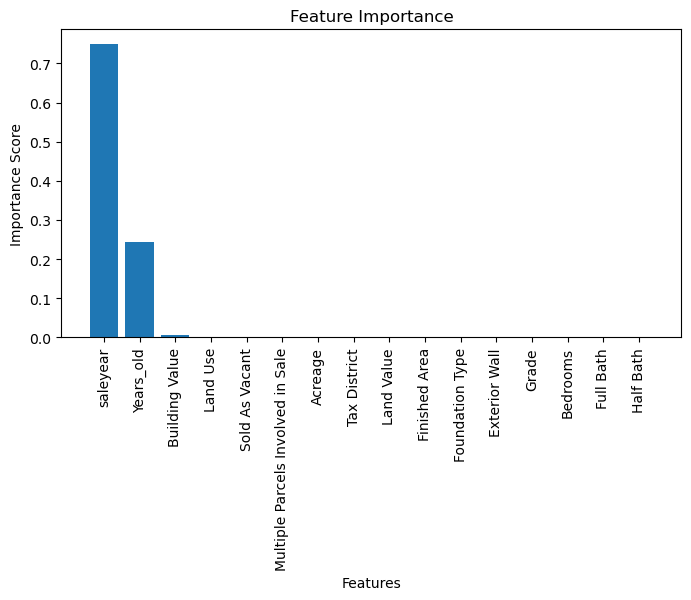

In [67]:
importances = decision_tree.feature_importances_
feature_names = X_train.columns

# Create a dictionary to store feature importance scores
feature_importance = dict(zip(feature_names, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and importance scores
features = [feature for feature, _ in sorted_features]
importances = [importance for _, importance in sorted_features]

# Plot the bar graph
plt.figure(figsize=(8, 4))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

# Display the plot
plt.show()

# Random Forest Model

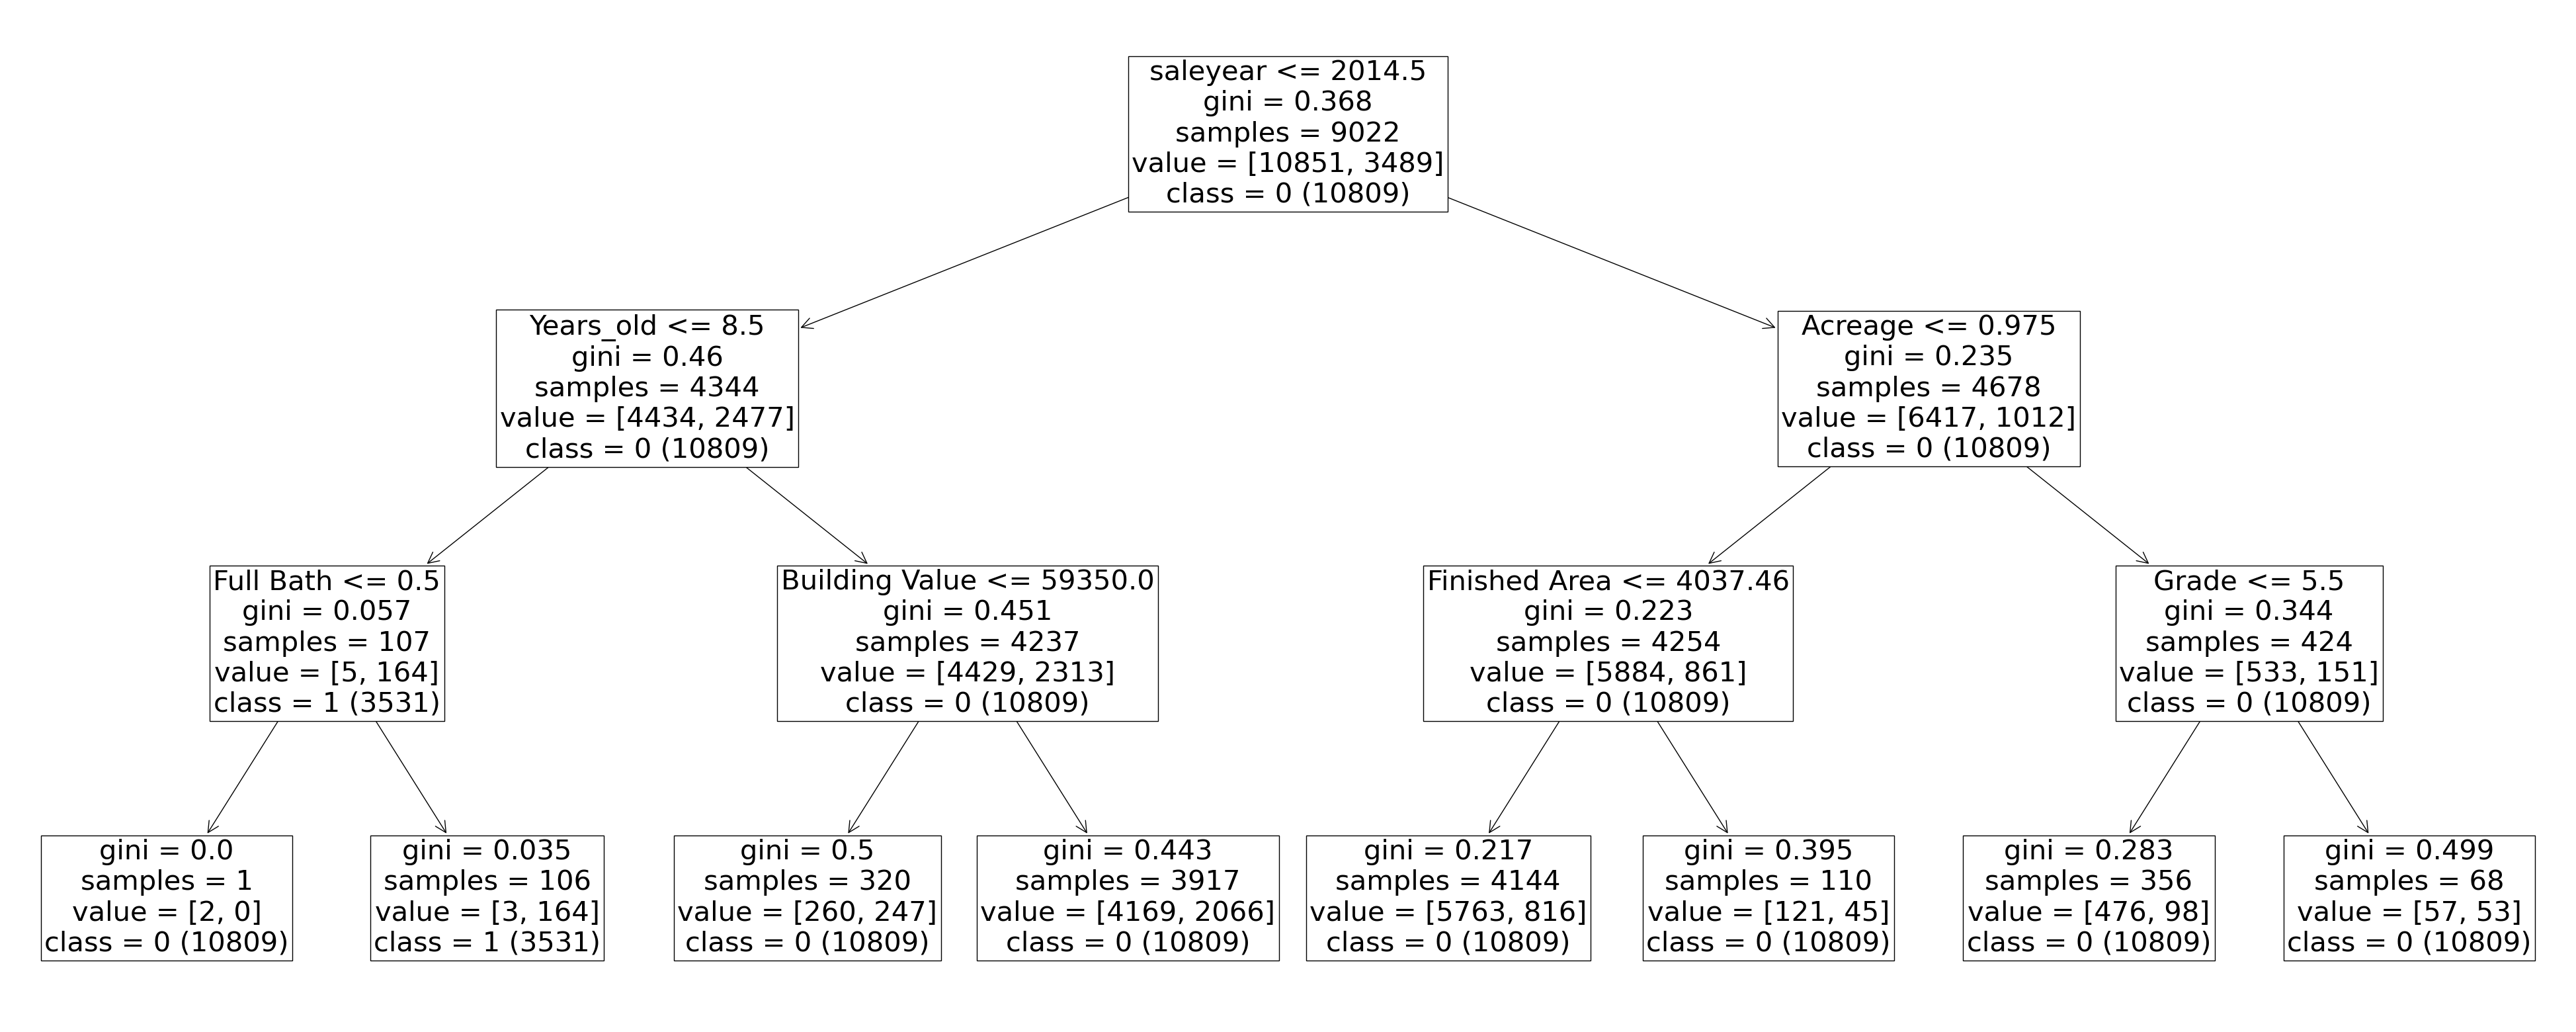

In [68]:
target = 'Sale Price Compared To Value'

# Combine numerical and categorical encoded features
X = data.drop(['Sale Price Compared To Value'], axis=1)
y = data['Sale Price Compared To Value'].astype(int)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating and fitting the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=3, random_state=0)
random_forest.fit(X_train, y_train)
# Choose a tree from the forest to plot (e.g., the first tree)
tree_to_plot = random_forest.estimators_[0]
# Get the unique target class values
class_values = y.unique()

plt.figure(figsize=(50, 20))
plot_tree(tree_to_plot, feature_names=X_train.columns,class_names=[f'{class_value} ({y_train.value_counts()[class_value]})' for class_value in class_values], fontsize=30)
plt.show()

# Predicting on the test set
y_pred = random_forest.predict(X_test)

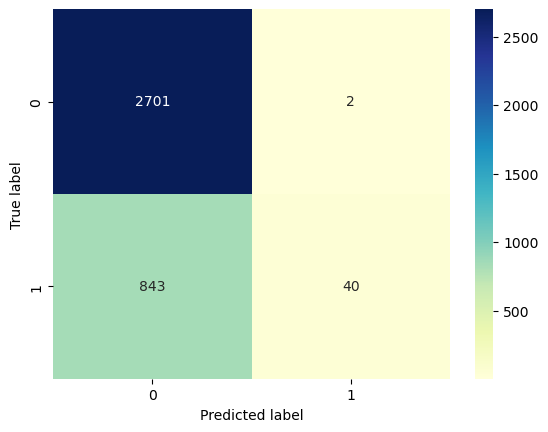

In [69]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [70]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7643614054657


In [71]:
# Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2703
           1       0.95      0.05      0.09       883

    accuracy                           0.76      3586
   macro avg       0.86      0.52      0.48      3586
weighted avg       0.81      0.76      0.67      3586



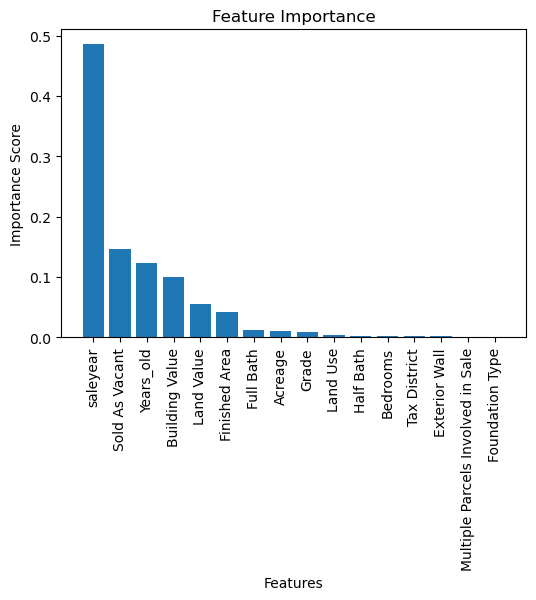

In [72]:
importances = random_forest.feature_importances_
feature_names = X_train.columns

# Create a dictionary to store feature importance scores
feature_importance = dict(zip(feature_names, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and importance scores
features = [feature for feature, _ in sorted_features]
importances = [importance for _, importance in sorted_features]

# Plot the bar graph
plt.figure(figsize=(6, 4))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

# Display the plot
plt.show()

# Grade Boosting Model

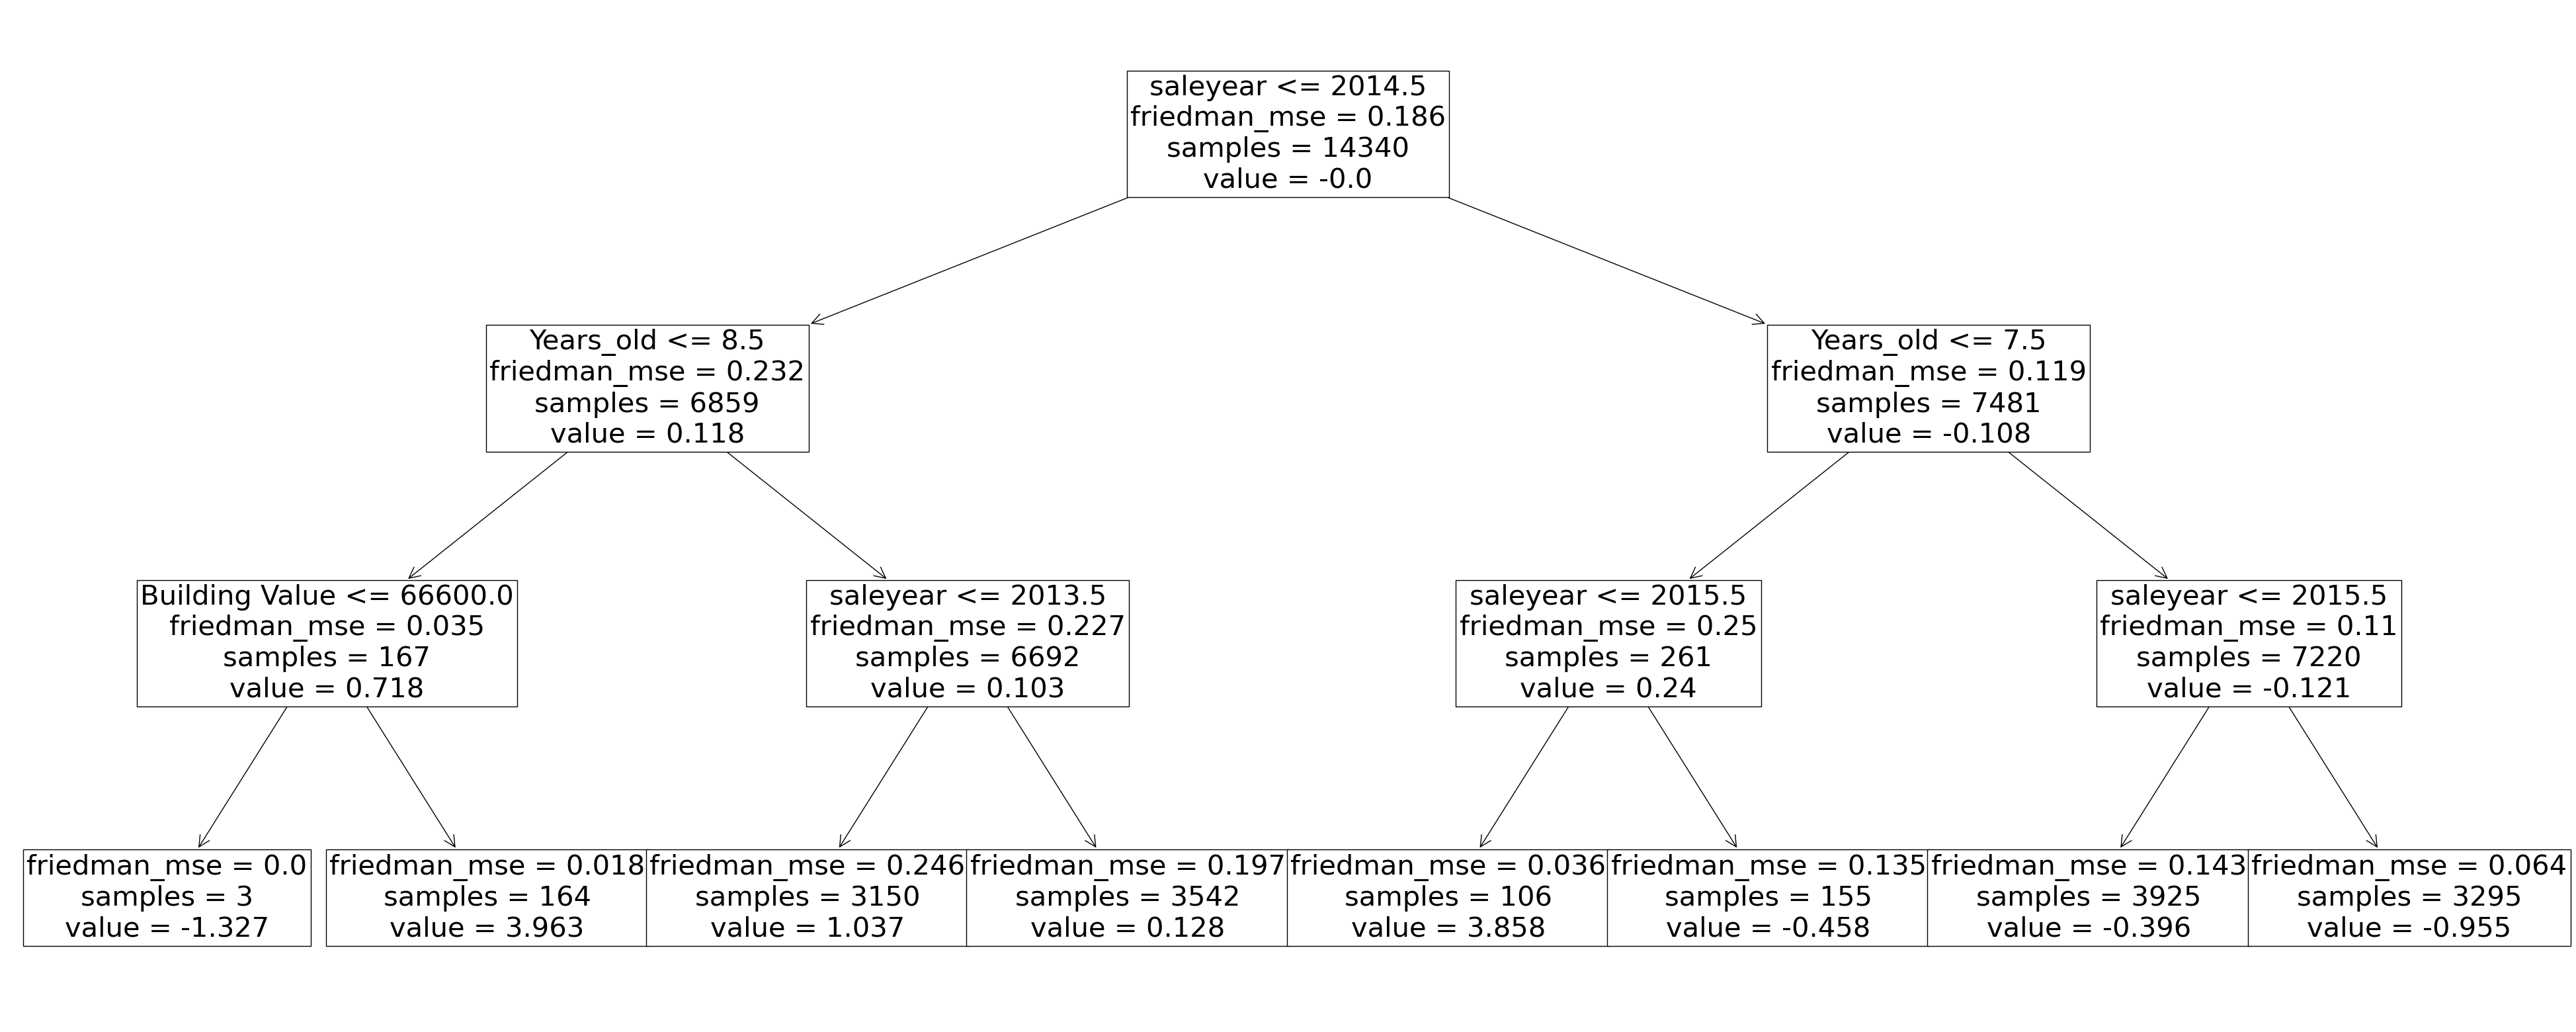

In [73]:
target = 'Sale Price Compared To Value'

# Combine numerical and categorical encoded features
X = data.drop(['Sale Price Compared To Value'], axis=1)
y = data['Sale Price Compared To Value'].astype(str)  # Convert target to string type for classification

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Creating and fitting the Gradient Boosting model
gradient_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=0)
gradient_boost.fit(X_train, y_train)

# Choose a tree from the forest to plot (e.g., the first tree)
tree_to_plot = gradient_boost.estimators_[0][0]  # Select the first tree

# Get the unique target class values
class_values = y.unique()

plt.figure(figsize=(50, 20))
plot_tree(tree_to_plot, feature_names=X_train.columns, class_names=[f'{class_value} ({y_train.value_counts()[class_value]})' for class_value in class_values], fontsize=30)
plt.show()

# Predicting on the test set
y_pred = gradient_boost.predict(X_test)


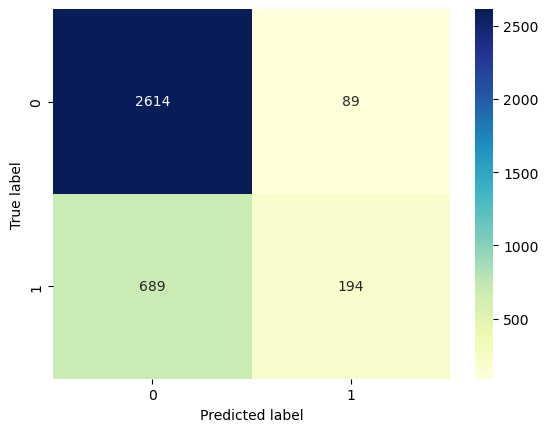

In [74]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [75]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7830451756832125


In [76]:
#Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2703
           1       0.69      0.22      0.33       883

    accuracy                           0.78      3586
   macro avg       0.74      0.59      0.60      3586
weighted avg       0.77      0.78      0.74      3586



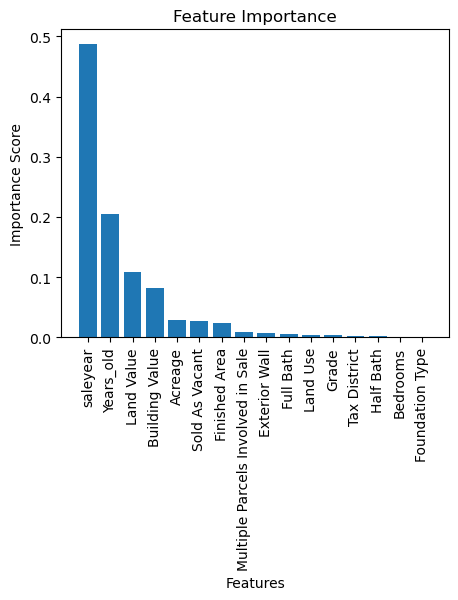

In [77]:
importances = gradient_boost.feature_importances_
feature_names = X_train.columns

# Create a dictionary to store feature importance scores
feature_importance = dict(zip(feature_names, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and importance scores
features = [feature for feature, _ in sorted_features]
importances = [importance for _, importance in sorted_features]

# Plot the bar graph
plt.figure(figsize=(5, 4))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

# Display the plot
plt.show()